In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline 
from scipy.interpolate import InterpolatedUnivariateSpline 
import glob, re
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

[array([-0.00498614,  0.00498614]), array([-0.00351973,  0.00351973]), array([-0.00334802,  0.00334802])]
[array([-0.0027343,  0.0027343]), array([-0.00237302,  0.00237302]), array([-0.00214286,  0.00214286])]


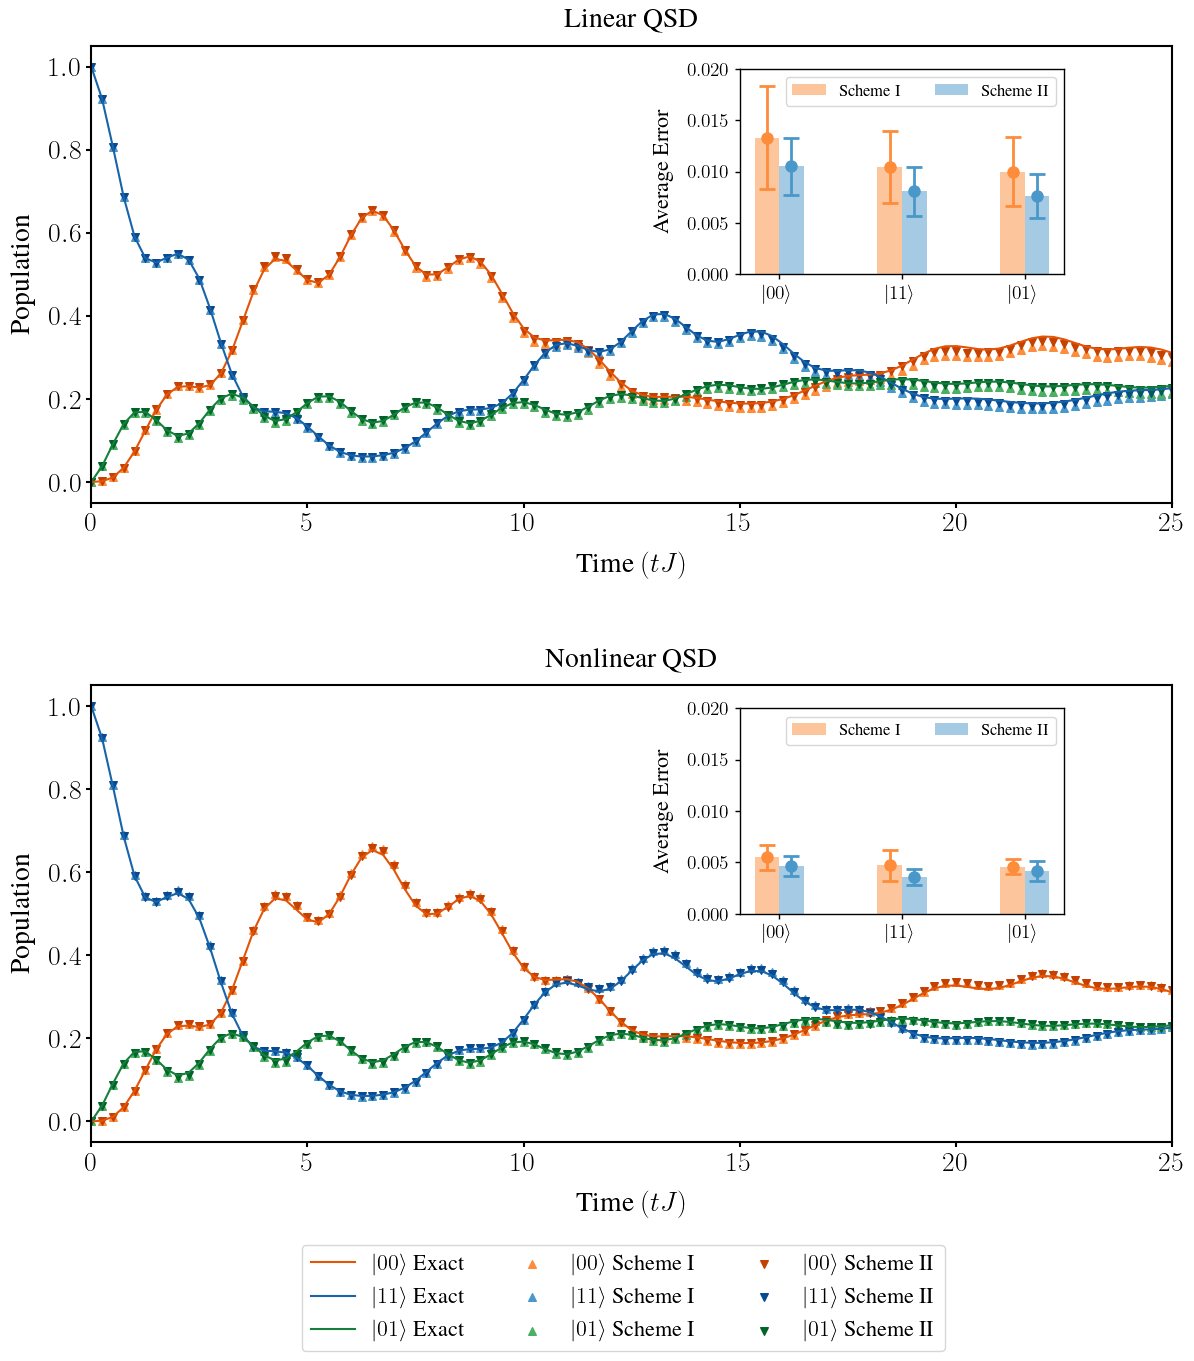

In [45]:
# population figure
T = 25
step_num = 100
tlist = np.linspace(0.0, T, step_num+1)
linear_files_list = glob.glob('TFIM_data/comparison_linear_1000traj_100step_False_*.npz')
nonlinear_files_list = glob.glob('TFIM_data/comparison_nonlinear_1000traj_100step_False_*.npz')
exact = np.load("TFIM_data/comparison_linear_1000traj_100step_False_0.npz")

array_linear_qsd = []
array_nonlinear_qsd = []

for file in linear_files_list:
    data = np.load(file)
    array_linear_qsd.append(data['qsd_result'])

for file in nonlinear_files_list:
    data = np.load(file)
    array_nonlinear_qsd.append(data['qsd_result'])


# linear
mean_values_linear = np.mean(array_linear_qsd, axis=0)
std_values_linear = np.std(array_linear_qsd, axis=0)
t_value = 3.249
n_samples = 10
margin_of_error_linear = t_value * (std_values_linear / np.sqrt(n_samples))

# nonlinear
mean_values_nonlinear = np.mean(array_nonlinear_qsd, axis=0)
std_values_nonlinear = np.std(array_nonlinear_qsd, axis=0)
t_value = 3.249
n_samples = 10
margin_of_error_nonlinear = t_value * (std_values_nonlinear / np.sqrt(n_samples))

exact_result = exact['exact_result']
exact_T = exact_result.T

array_error_linear_M1 = []
array_error_linear_M2 = []
array_error_nonlinear_M1 = []
array_error_nonlinear_M2 = []
array_linear_qsd = np.array(array_linear_qsd)
array_nonlinear_qsd = np.array(array_nonlinear_qsd)

for i in range(10):
    error_linear_M1 = np.abs(array_linear_qsd[i,:,:,0] - exact_T)
    array_error_linear_M1.append(error_linear_M1)
    error_linear_M2 = np.abs(array_linear_qsd[i,:,:,1] - exact_T)
    array_error_linear_M2.append(error_linear_M2)
    error_nonlinear_M1 = np.abs(array_nonlinear_qsd[i,:,:,0] - exact_T)
    array_error_nonlinear_M1.append(error_nonlinear_M1)
    error_nonlinear_M2 = np.abs(array_nonlinear_qsd[i,:,:,1] - exact_T)
    array_error_nonlinear_M2.append(error_nonlinear_M2)

sum_err_linear_M1 = np.sum(array_error_linear_M1, axis = 1)/len(tlist)
sum_err_linear_M2 = np.sum(array_error_linear_M2, axis = 1)/len(tlist)
sum_err_nonlinear_M1 = np.sum(array_error_nonlinear_M1, axis = 1)/len(tlist)
sum_err_nonlinear_M2 = np.sum(array_error_nonlinear_M2, axis = 1)/len(tlist)

# set the font size and style of the plot
spines_linewidth = 1.5
linewidth = 1.5
font_size = 20
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": font_size
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

# plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.tight_layout(h_pad=5)
ax1.set_xlim([0,T])
ax1.spines['top'].set_linewidth(spines_linewidth)
ax1.spines['right'].set_linewidth(spines_linewidth)
ax1.spines['bottom'].set_linewidth(spines_linewidth)
ax1.spines['left'].set_linewidth(spines_linewidth)
ax2.set_xlim([0,T])
ax2.spines['top'].set_linewidth(spines_linewidth)
ax2.spines['right'].set_linewidth(spines_linewidth)
ax2.spines['bottom'].set_linewidth(spines_linewidth)
ax2.spines['left'].set_linewidth(spines_linewidth)

legend_labels_exact = [r'$|00\rangle$ Exact', r'$|11\rangle$ Exact', r'$|01\rangle$ Exact']
legend_labels_M1 = [r'$|00\rangle$ Scheme I', r'$|11\rangle$ Scheme I', r'$|01\rangle$ Scheme I']
legend_labels_M2 = [r'$|00\rangle$ Scheme II', r'$|11\rangle$ Scheme II', r'$|01\rangle$ Scheme II']

colormap_red = plt.get_cmap('Reds')
colormap_green = plt.get_cmap('Greens')
colormap_blue = plt.get_cmap('Blues')
colormap_orange = plt.get_cmap('Oranges')

exact_color_per = 0.8
qsd_color_per1 = 0.6
qsd_color_per2 = 0.9

color_exact = [colormap_orange(exact_color_per-0.1), 
               colormap_blue(exact_color_per), 
               colormap_green(exact_color_per), 
               colormap_red(exact_color_per+0.1)]
color_1 = [colormap_orange(qsd_color_per1-0.1), 
                colormap_blue(qsd_color_per1), 
                colormap_green(qsd_color_per1), 
                colormap_red(qsd_color_per1+0.2)]
color_2 = [colormap_orange(qsd_color_per2-0.1), 
                colormap_blue(qsd_color_per2), 
                colormap_green(qsd_color_per2), 
                colormap_red(qsd_color_per2+0.2)]

for i in range(3):
    ax1.plot(tlist, exact['exact_result'][i, :], linewidth=linewidth, label=legend_labels_exact[i], color = color_exact[i])
for i in range(3):
    ax1.scatter(tlist, mean_values_linear[:, i, 0], s=30, label=legend_labels_M1[i], color=color_1[i], marker = '^')
for i in range(3):
    ax1.scatter(tlist, mean_values_linear[:, i, 1], s=30, label=legend_labels_M2[i], color=color_2[i], marker = 'v')

for i in range(3):
    ax2.plot(tlist, exact['exact_result'][i, :], linewidth=linewidth, label=legend_labels_exact[i], color = color_exact[i])
for i in range(3):
    ax2.scatter(tlist, mean_values_nonlinear[:, i, 0], s=30, label=legend_labels_M1[i], color=color_1[i], marker = '^')
for i in range(3):
    ax2.scatter(tlist, mean_values_nonlinear[:, i, 1], s=30, label=legend_labels_M2[i], color=color_2[i], marker = 'v')
 
legend_labels = [r'$|00\rangle$', r'$|11\rangle$', r'$|01\rangle$']
width = 0.2
multiplier = 0.5
x = np.arange(3)
axins_1 = ax1.inset_axes((0.6, 0.5, 0.3, 0.45))
axins_1.spines['top'].set_linewidth(spines_linewidth-0.5)
axins_1.spines['right'].set_linewidth(spines_linewidth-0.5)
axins_1.spines['bottom'].set_linewidth(spines_linewidth-0.5)
axins_1.spines['left'].set_linewidth(spines_linewidth-0.5)
axins_1.tick_params(width=spines_linewidth-0.5, labelsize=font_size-6)
axins_1.xaxis.set_ticks([])
axins_1.set_ylim([0, 0.02])
datas = [sum_err_linear_M1, sum_err_linear_M2]
for i in range(2):
    offset = width * multiplier
    mean = [np.mean(datas[i][:,k]) for k in range(3)]
    rects = axins_1.bar(x+offset, mean, width, label=['Scheme I', 'Scheme II'][i], color=color_1[i], alpha=0.5)
    std = [stats.t.interval(0.99, df=9, loc=mean[k], scale=np.std(datas[i][:,k])/3)-mean[k] for k in range(3)]
    print(std)
    axins_1.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    multiplier += 1
axins_1.set_xticks(x + width, legend_labels)
axins_1.legend(fontsize=font_size-8, ncol=2)
axins_1.set_ylabel(r'Average Error', fontsize=font_size-4, labelpad=10)

legend_labels = [r'$|00\rangle$', r'$|11\rangle$', r'$|01\rangle$']
width = 0.2
multiplier = 0.5
x = np.arange(3)
axins_2 = ax2.inset_axes((0.6, 0.5, 0.3, 0.45))
axins_2.spines['top'].set_linewidth(spines_linewidth-0.5)
axins_2.spines['right'].set_linewidth(spines_linewidth-0.5)
axins_2.spines['bottom'].set_linewidth(spines_linewidth-0.5)
axins_2.spines['left'].set_linewidth(spines_linewidth-0.5)
axins_2.tick_params(width=spines_linewidth-0.5, labelsize=font_size-6)
axins_2.xaxis.set_ticks([])
axins_2.set_ylim([0, 0.02])
datas = [sum_err_nonlinear_M1, sum_err_nonlinear_M2]
for i in range(2):
    offset = width * multiplier
    mean = [np.mean(datas[i][:,k]) for k in range(3)]
    rects = axins_2.bar(x+offset, mean, width, label=['Scheme I', 'Scheme II'][i], color=color_1[i], alpha=0.5)
    std = [stats.t.interval(0.99, df=9, loc=mean[k], scale=np.std(datas[i][:,k])/3)-mean[k] for k in range(3)]
    axins_2.errorbar(x+offset, mean, fmt='o', yerr=abs(np.array(std).T), 
                 elinewidth=2, capsize=6, capthick=2, markersize=8, color=color_1[i])
    multiplier += 1
axins_2.set_xticks(x + width, legend_labels)
axins_2.legend(fontsize=font_size-8, ncol=2)
axins_2.set_ylabel(r'Average Error', fontsize=font_size-4, labelpad=10)

ax1.set_title(r'{Linear QSD}', fontsize=font_size, y=1.02)
ax2.set_title(r'{Nonlinear QSD}', fontsize=font_size, y=1.02)
ax1.set_xlabel(r'{Time $(tJ)$}', fontsize=font_size, labelpad=10)
ax1.set_ylabel(r'{Population}', fontsize=font_size, labelpad=10)
ax1.tick_params(width=spines_linewidth, labelsize=font_size)
ax2.set_xlabel(r'{Time $(tJ)$}', fontsize=font_size, labelpad=10)
ax2.set_ylabel(r'{Population}', fontsize=font_size, labelpad=10)
ax2.tick_params(width=spines_linewidth, labelsize=font_size)

ax2.legend(fontsize=font_size-4, ncol=3, bbox_to_anchor=(0.8, -0.2))

plt.savefig('TFIM_linear_nonlinear_comp.pdf', dpi=600, bbox_inches='tight')